In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/18-22 updated.csv')

# Display the first few rows of the dataframe
print(df.head())


<ipython-input-1-90caa993bf16>:4: DtypeWarning: Columns (1,2,3,5,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/18-22 updated.csv')


                   time       latitude     longitude        CRW_DHW  \
0                   UTC  degrees_north  degrees_east  Celsius weeks   
1  2018-04-23T12:00:00Z         89.975      -179.975            NaN   
2  2018-04-23T12:00:00Z         89.975      -179.475            NaN   
3  2018-04-23T12:00:00Z         89.975      -178.975            NaN   
4  2018-04-23T12:00:00Z         89.975      -178.475            NaN   

   CRW_DHW_mask CRW_HOTSPOT  CRW_HOTSPOT_mask  CRW_SST CRW_SSTANOMALY  
0             1     Celsius                 1  Celsius        Celsius  
1             4         NaN                 4     -1.8            NaN  
2             4         NaN                 4     -1.8            NaN  
3             4         NaN                 4     -1.8            NaN  
4             4         NaN                 4     -1.8            NaN  


In [ ]:
# Keep 'time', 'latitude', 'longitude', 'CRW_HOTSPOT', and 'CRW_HOTSPOT_mask' columns
df_filtered = df[['time', 'latitude', 'longitude', 'CRW_HOTSPOT', 'CRW_HOTSPOT_mask']]

# Display the first few rows of the filtered dataframe
print(df_filtered.head())


                   time       latitude     longitude CRW_HOTSPOT  \
0                   UTC  degrees_north  degrees_east     Celsius   
1  2018-04-23T12:00:00Z         89.975      -179.975         NaN   
2  2018-04-23T12:00:00Z         89.975      -179.475         NaN   
3  2018-04-23T12:00:00Z         89.975      -178.975         NaN   
4  2018-04-23T12:00:00Z         89.975      -178.475         NaN   

   CRW_HOTSPOT_mask  
0                 1  
1                 4  
2                 4  
3                 4  
4                 4  


In [ ]:
# Count the number of unique values in 'CRW_HOTSPOT_mask' column
hotspot_mask_counts = df_filtered['CRW_HOTSPOT_mask'].value_counts()

# Display the counts
print(hotspot_mask_counts)


CRW_HOTSPOT_mask
0    10304820
1     6391975
4     2460153
2       23853
Name: count, dtype: int64


In [ ]:
import folium
from folium.plugins import HeatMap

# Filter the DataFrame for the specific date
df_specific_date = df_filtered[df_filtered['time'] == '2018-04-23T12:00:00Z']

# Define color scheme for the colorbar for each value of hotspot mask
gradient = {
    0: 'purple',
    1: 'yellow',
    2: 'red',
    3: 'maroon'
}

# Create a Folium map
m = folium.Map()

# Iterate over each value of hotspot mask and add heatmap layer with colorbar
for value, color in gradient.items():
    # Filter the DataFrame for the specific value of hotspot mask
    df_specific_value = df_specific_date[df_specific_date['CRW_HOTSPOT_mask'] == value]
    # Extract latitude, longitude, and hotspot mask data
    heat_data = [[row['latitude'], row['longitude']] for index, row in df_specific_value.iterrows()]
    # Add heatmap layer for the specific value with color from the gradient
    HeatMap(heat_data, radius=10, gradient={0.0: color}, max_val=1).add_to(m)

# Display the map
m


<ipython-input-7-3ba81640dba9>:25: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heat_data, radius=10, gradient={0.0: color}, max_val=1).add_to(m)


In [ ]:
import folium
from folium.plugins import HeatMap
import pandas as pd
import re  # For regular expressions

# Assuming your data is in a CSV file named '18-22 updated.csv' and is located in your Google Drive
data_path = '/content/drive/MyDrive/18-22 updated.csv'

# Clean column names in the CSV file (assuming headers are in the first line)
with open(data_path, 'r') as f:
    data = f.readlines()
data[0] = re.sub(r'[^\w\s_]*(\w+)[^\w\s_]*', r'\1', data[0])  # Replace non-alphanumeric characters around column names with nothing

with open('cleaned_data.csv', 'w') as f:
    f.writelines(data)

# Read the cleaned CSV data, specifying data types
df = pd.read_csv('cleaned_data.csv', dtype={
    'time': str,
    'latitude': float,  # Assuming latitude is numeric after removing 'degrees_north'
    'longitude': float,  # Assuming longitude is numeric after removing 'degrees_east'
    'CRW_DHW': float,
    'CRW_DHW_mask': int,  # Assuming mask is integer
    'CRW_HOTSPOT': float,  # Assuming hotspot is a numerical value (Celsius)
    'CRW_HOTSPOT_mask': int,  # Assuming mask is integer
    'CRW_SST': float,
    'CRW_SSTANOMALY': float
})

# Delete the temporary file after reading
!rm cleaned_data.csv  # Assuming you're using Colab (adjust for your environment if needed)

# Filter the DataFrame for the specific date (replace with your desired date)
date_to_visualize = '2018-04-23T12:00:00Z'
df_specific_date = df[df['time'] == date_to_visualize]

# Define color gradient based on hotspot values (adjust min/max based on your data)
gradient = {
    0.0: 'blue',  # Cooler color for lower hotspot values
    0.5: 'yellow',  # Midpoint color
    1.0: 'red'   # Warmer color for higher hotspot values
}

# Create a Folium map
m = folium.Map(location=[0, 0], zoom_start=2)  # Center map at (0, 0) with initial zoom level 2

# Ensure CRW_HOTSPOT is numerical (data cleaning might still be needed)
df_specific_date['CRW_HOTSPOT'] = pd.to_numeric(df_specific_date['CRW_HOTSPOT'], errors='coerce')

# Create and add the heatmap layer
heatmap = HeatMap(
    [[row['latitude'], row['longitude'], row['CRW_HOTSPOT']] for index, row in df_specific_date.iterrows()],
    radius=15,  # Adjust radius as needed
    gradient=gradient,
    max_val=max(df_specific_date['CRW_HOTSPOT'])  # Set max_val based on your data
)
heatmap.add_to(m)

# (Optional) Add a colorbar to the map
colorbar = folium.ColorMap(caption='Hotspot Value', legend_type='linear', palette=gradient.keys())
colorbar.add_to(m)

# Display the map
m


In [ ]:
import folium
from folium.plugins import HeatMap

# Filter the DataFrame for the specific date
df_specific_date = df_filtered[df_filtered['time'] == '2018-04-23T12:00:00Z']

# Define color scheme for the colorbar for hotspots
gradient = {
    0.0: 'blue',    # Cooler color for lower hotspot values
    0.5: 'yellow',  # Midpoint color
    1.0: 'red'      # Warmer color for higher hotspot values
}

# Create a Folium map
m = folium.Map()

# Iterate over each value of hotspot and add heatmap layer with colorbar
for value, color in gradient.items():
    # Filter the DataFrame for the specific value of hotspot
    df_specific_value = df_specific_date[df_specific_date['CRW_HOTSPOT'] == value]
    # Extract latitude and longitude data
    heat_data = [[row['latitude'], row['longitude']] for index, row in df_specific_value.iterrows()]
    # Add heatmap layer for the specific value with color from the gradient
    HeatMap(heat_data, radius=10, gradient=gradient, max_val=1).add_to(m)

# Display the map
m
#2018-07-12T12:00:00Z


<ipython-input-3-ee3be8a7b736>:24: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heat_data, radius=10, gradient=gradient, max_val=1).add_to(m)


In [ ]:
import folium
from folium.plugins import HeatMap

# Filter the DataFrame for the specific date
df_specific_date = df_filtered[df_filtered['time'] == '2018-07-12T12:00:00Z']

# Define color scheme for the colorbar for hotspots
gradient = {
    0.0: 'blue',    # Cooler color for lower hotspot values
    0.5: 'yellow',  # Midpoint color
    1.0: 'red'      # Warmer color for higher hotspot values
}

# Create a Folium map
m = folium.Map()

# Iterate over each value of hotspot and add heatmap layer with colorbar
for value, color in gradient.items():
    # Filter the DataFrame for the specific value of hotspot
    df_specific_value = df_specific_date[df_specific_date['CRW_HOTSPOT'] == value]
    # Extract latitude and longitude data
    heat_data = [[row['latitude'], row['longitude']] for index, row in df_specific_value.iterrows()]
    # Add heatmap layer for the specific value with color from the gradient
    HeatMap(heat_data, radius=10, gradient=gradient, max_val=1).add_to(m)

# Display the map
m
#


<ipython-input-4-77ce5cc6a77d>:24: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heat_data, radius=10, gradient=gradient, max_val=1).add_to(m)


In [ ]:
import pandas as pd

# Assuming you have the filtered DataFrame df_filtered
# Convert 'time' column to datetime type with inferred format
df_filtered['time'] = pd.to_datetime(df_filtered['time'], errors='coerce')

# Drop rows where 'time' is NaT (not a valid datetime)
df_filtered = df_filtered.dropna(subset=['time'])

# Extract unique dates
unique_dates = df_filtered['time'].dt.date.unique()

# Display the unique dates
print(unique_dates)


<ipython-input-7-1550b33a7229>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_filtered['time'] = pd.to_datetime(df_filtered['time'], errors='coerce')
<ipython-input-7-1550b33a7229>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['time'] = pd.to_datetime(df_filtered['time'], errors='coerce')


[datetime.date(2018, 4, 23) datetime.date(2018, 5, 13)
 datetime.date(2018, 6, 2) datetime.date(2018, 6, 22)
 datetime.date(2018, 7, 12) datetime.date(2018, 8, 1)
 datetime.date(2018, 8, 21) datetime.date(2018, 9, 10)
 datetime.date(2018, 9, 30) datetime.date(2018, 10, 20)
 datetime.date(2018, 11, 9) datetime.date(2018, 11, 29)
 datetime.date(2018, 12, 19) datetime.date(2019, 1, 8)
 datetime.date(2019, 1, 28) datetime.date(2019, 2, 17)
 datetime.date(2019, 3, 9) datetime.date(2019, 3, 29)
 datetime.date(2019, 4, 18) datetime.date(2019, 5, 8)
 datetime.date(2019, 5, 28) datetime.date(2019, 6, 17)
 datetime.date(2019, 7, 7) datetime.date(2019, 7, 27)
 datetime.date(2019, 8, 16) datetime.date(2019, 9, 5)
 datetime.date(2019, 9, 25) datetime.date(2019, 10, 15)
 datetime.date(2019, 11, 4) datetime.date(2019, 11, 24)
 datetime.date(2019, 12, 14) datetime.date(2020, 1, 3)
 datetime.date(2020, 1, 23) datetime.date(2020, 2, 12)
 datetime.date(2020, 3, 3) datetime.date(2020, 3, 23)
 datetime.dat

<ipython-input-13-0577f5ddd148>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_specific_date['latitude'] = df_specific_date['latitude'].astype(float)
<ipython-input-13-0577f5ddd148>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_specific_date['longitude'] = df_specific_date['longitude'].astype(float)


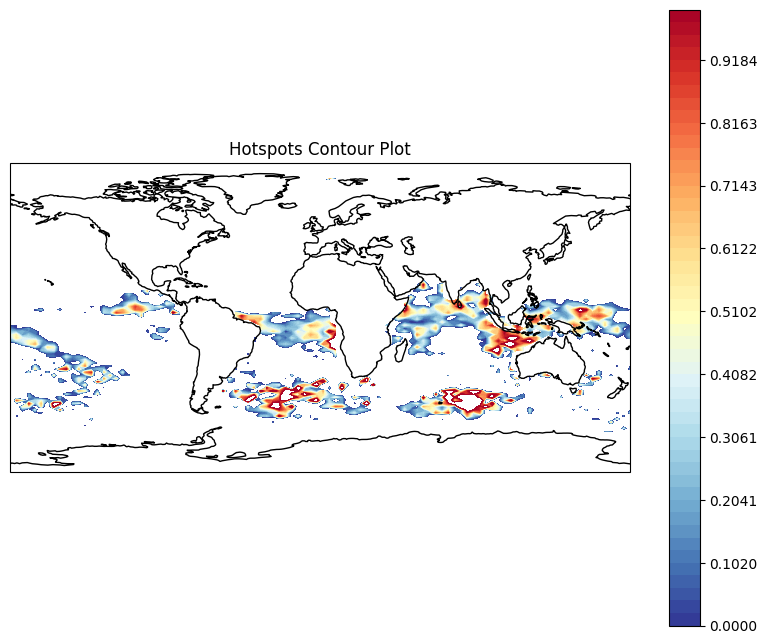

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define the specific date
specific_date = '2018-04-23T12:00:00Z'

# Filter the DataFrame for the specific date
df_specific_date = df_filtered[df_filtered['time'] == specific_date]

# Convert 'latitude' and 'longitude' columns to float type
df_specific_date['latitude'] = df_specific_date['latitude'].astype(float)
df_specific_date['longitude'] = df_specific_date['longitude'].astype(float)

# Create a meshgrid for latitude and longitude
lats = np.linspace(df_specific_date['latitude'].min(), df_specific_date['latitude'].max(), 100)
lons = np.linspace(df_specific_date['longitude'].min(), df_specific_date['longitude'].max(), 100)
LON, LAT = np.meshgrid(lons, lats)

# Create a 2D array of hotspot values corresponding to the meshgrid
hotspots = np.zeros_like(LON)
for index, row in df_specific_date.iterrows():
    lat_index = np.argmin(np.abs(lats - row['latitude']))
    lon_index = np.argmin(np.abs(lons - row['longitude']))
    hotspots[lat_index, lon_index] = row['CRW_HOTSPOT']

# Create the contour plot
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
contour = ax.contourf(LON, LAT, hotspots, levels=np.linspace(0, 1, 50), cmap='RdYlBu_r')

# Add colorbar
plt.colorbar(contour)

# Add title
plt.title('Hotspots Contour Plot')

# Add world map outline
ax.add_feature(cfeature.COASTLINE)

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os

# Define the output directory to save images
output_dir = "hotspots_images"
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn't exist

# Define the specific dates from your dataset
specific_dates = df_filtered['time'].unique()

# Create a function to generate and save the plot for each date
def generate_and_save_plot(date):
    # Filter the DataFrame for the specific date
    df_specific_date = df_filtered[df_filtered['time'] == date].copy()  # Make a copy to avoid modifying the original DataFrame

    # Convert 'latitude' and 'longitude' columns to float type, handling non-numeric values
    df_specific_date['latitude'] = pd.to_numeric(df_specific_date['latitude'], errors='coerce')
    df_specific_date['longitude'] = pd.to_numeric(df_specific_date['longitude'], errors='coerce')

    # Drop rows with NaN values in latitude or longitude
    df_specific_date.dropna(subset=['latitude', 'longitude'], inplace=True)

    # Check if there are enough valid coordinates to create the plot
    if len(df_specific_date) < 2:
        return

    # Create a meshgrid for latitude and longitude
    lats = np.linspace(df_specific_date['latitude'].min(), df_specific_date['latitude'].max(), 100)
    lons = np.linspace(df_specific_date['longitude'].min(), df_specific_date['longitude'].max(), 100)
    LON, LAT = np.meshgrid(lons, lats)

    # Create a 2D array of hotspot values corresponding to the meshgrid
    hotspots = np.zeros_like(LON)
    for index, row in df_specific_date.iterrows():
        lat_index = np.argmin(np.abs(lats - row['latitude']))
        lon_index = np.argmin(np.abs(lons - row['longitude']))
        hotspots[lat_index, lon_index] = row['CRW_HOTSPOT']

    # Create the contour plot
    plt.figure(figsize=(10, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())  # Create a Cartopy axis
    contour = ax.contourf(LON, LAT, hotspots, levels=np.linspace(0, 1, 50), cmap='RdYlBu_r')

    # Add colorbar
    plt.colorbar(contour)

    # Add title
    plt.title(f'Hotspots Contour Plot - {date}')

    # Add world map outline
    ax.add_feature(cfeature.COASTLINE)

    # Save the plot as an image with the date as the filename
    output_file = os.path.join(output_dir, f'hotspots_{date}.png')
    plt.savefig(output_file)
    plt.close()  # Close the plot to prevent displaying it in the notebook

# Generate and save plots for each date
for date in specific_dates:
    generate_and_save_plot(date)

print("Images saved successfully.")


Images saved successfully.


In [5]:
%cd /content/hotspots_images

/content/hotspots_images


In [6]:
!zip -r hotspots_images.zip *

  adding: hotspots_2018-04-23T12:00:00Z.png (deflated 10%)
  adding: hotspots_2018-05-13T12:00:00Z.png (deflated 11%)
  adding: hotspots_2018-06-02T12:00:00Z.png (deflated 12%)
  adding: hotspots_2018-06-22T12:00:00Z.png (deflated 12%)
  adding: hotspots_2018-07-12T12:00:00Z.png (deflated 11%)
  adding: hotspots_2018-08-01T12:00:00Z.png (deflated 10%)
  adding: hotspots_2018-08-21T12:00:00Z.png (deflated 9%)
  adding: hotspots_2018-09-10T12:00:00Z.png (deflated 9%)
  adding: hotspots_2018-09-30T12:00:00Z.png (deflated 9%)
  adding: hotspots_2018-10-20T12:00:00Z.png (deflated 11%)
  adding: hotspots_2018-11-09T12:00:00Z.png (deflated 12%)
  adding: hotspots_2018-11-29T12:00:00Z.png (deflated 13%)
  adding: hotspots_2018-12-19T12:00:00Z.png (deflated 12%)
  adding: hotspots_2019-01-08T12:00:00Z.png (deflated 10%)
  adding: hotspots_2019-01-28T12:00:00Z.png (deflated 9%)
  adding: hotspots_2019-02-17T12:00:00Z.png (deflated 8%)
  adding: hotspots_2019-03-09T12:00:00Z.png (deflated 8%)
  a

In [7]:
from google.colab import files
files.download('hotspots_images.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>